# Import packages

In [21]:
from pathlib import Path

from fastai.vision.all import *
from src.models import CloudNet
from src.nn_vis import get_gradcam, plot_gradcam

# Define DataLoader

In [22]:
processed_dir = Path('../data/processed')
valid_percent = 0.1
batch_transforms = aug_transforms()
num_workers = 0

train_loader = ImageDataLoaders.from_folder(
    processed_dir,
    train='train',
    valid_pct=valid_percent,
    batch_tfms=batch_transforms,
    num_workers=num_workers
).cuda()

def get_image_files_ori(source, **kwarg):
    return [path 
            for path in get_image_files(source, **kwarg)
            if 'resize' in path.name]
test_loader = train_loader.test_dl(get_image_files(processed_dir/'test'), with_labels=True, shuffle=True)
test_loader_ori = train_loader.test_dl(get_image_files_ori(processed_dir/'test'), with_labels=True, shuffle=True)

# CloudNet
## Define Learner

In [23]:
model = CloudNet(num_classes=11)
learner = Learner(train_loader, model, path='..')
learner.load('CloudNet')

## Use all images in the test data set to evaluate the model

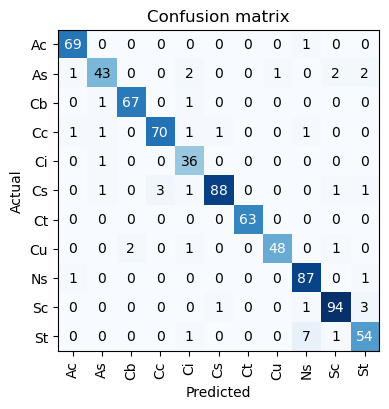

In [24]:
interp = ClassificationInterpretation.from_learner(learner, dl=test_loader)
interp.plot_confusion_matrix(figsize=(4, 4))

In [25]:
interp.print_classification_report()

              precision    recall  f1-score   support

          Ac       0.96      0.99      0.97        70
          As       0.91      0.84      0.88        51
          Cb       0.97      0.97      0.97        69
          Cc       0.96      0.93      0.95        75
          Ci       0.84      0.97      0.90        37
          Cs       0.98      0.93      0.95        95
          Ct       1.00      1.00      1.00        63
          Cu       0.98      0.92      0.95        52
          Ns       0.90      0.98      0.94        89
          Sc       0.95      0.95      0.95        99
          St       0.89      0.86      0.87        63

    accuracy                           0.94       763
   macro avg       0.94      0.94      0.94       763
weighted avg       0.94      0.94      0.94       763



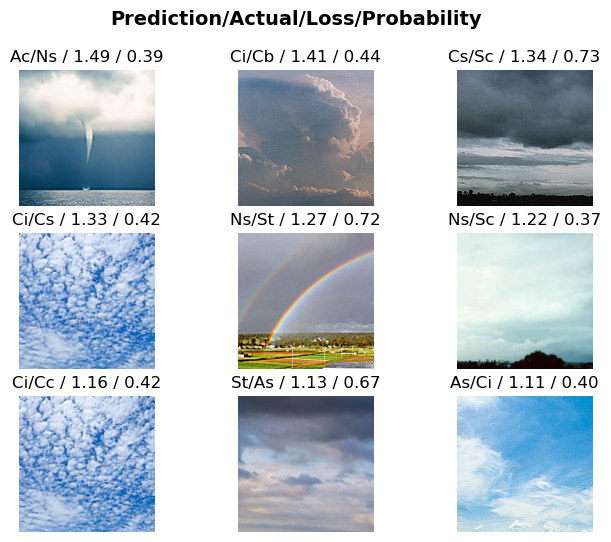

In [26]:
interp.plot_top_losses(9, figsize=(8, 6))

### Grad-Cam

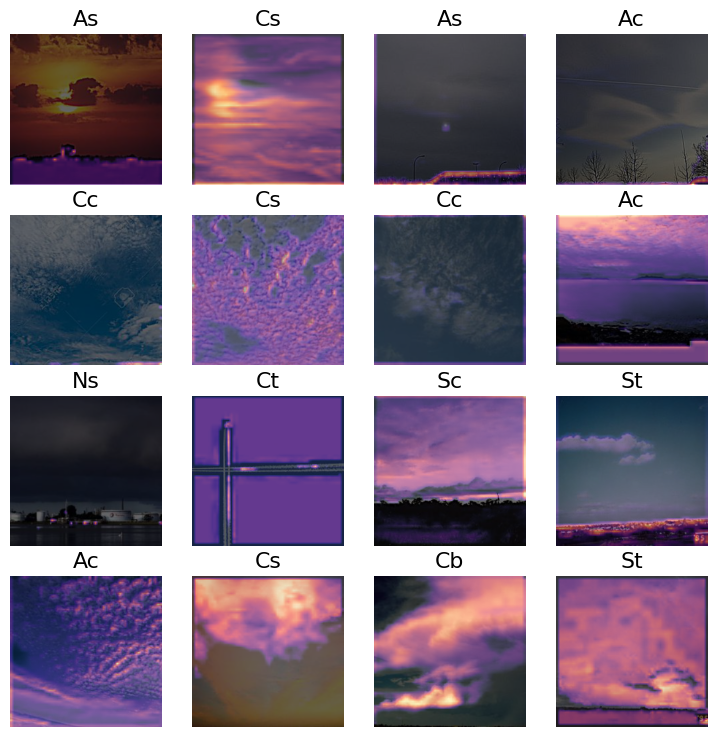

In [27]:
num_heatmap = 16

x, y = test_loader.one_batch()
xy_list_decode = test_loader.decode_batch((x, y), max_n=num_heatmap)
target_layer = learner.model.features[1]
learner.model.to('cuda')

cam_map = [get_gradcam(x[i], y[i], target_layer, learner.model) for i in range(num_heatmap)]
fig, axs = plt.subplots(4, 4, figsize=(9, 9))
for i, ax in enumerate(axs.flat):
    plot_gradcam(*xy_list_decode[i], cam_map[i], ax=ax)

## Use the resized images in the test data set to evaluate the model

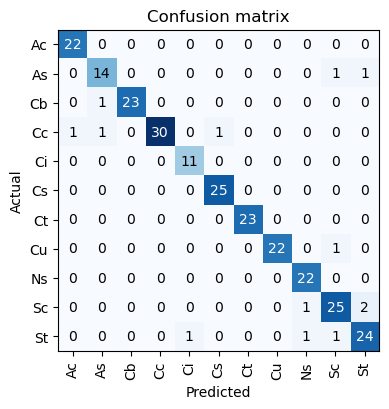

In [28]:
interp = ClassificationInterpretation.from_learner(learner, dl=test_loader_ori)
interp.plot_confusion_matrix(figsize=(4, 4))

In [29]:
interp.print_classification_report()

              precision    recall  f1-score   support

          Ac       0.96      1.00      0.98        22
          As       0.88      0.88      0.88        16
          Cb       1.00      0.96      0.98        24
          Cc       1.00      0.91      0.95        33
          Ci       0.92      1.00      0.96        11
          Cs       0.96      1.00      0.98        25
          Ct       1.00      1.00      1.00        23
          Cu       1.00      0.96      0.98        23
          Ns       0.92      1.00      0.96        22
          Sc       0.89      0.89      0.89        28
          St       0.89      0.89      0.89        27

    accuracy                           0.95       254
   macro avg       0.95      0.95      0.95       254
weighted avg       0.95      0.95      0.95       254



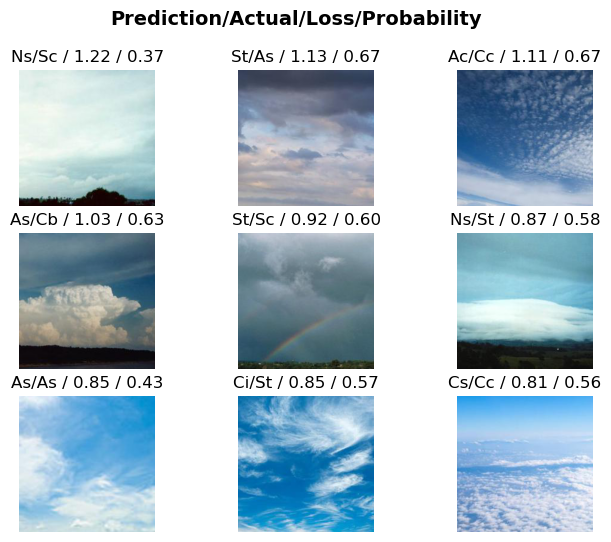

In [30]:
interp.plot_top_losses(9, figsize=(8, 6))

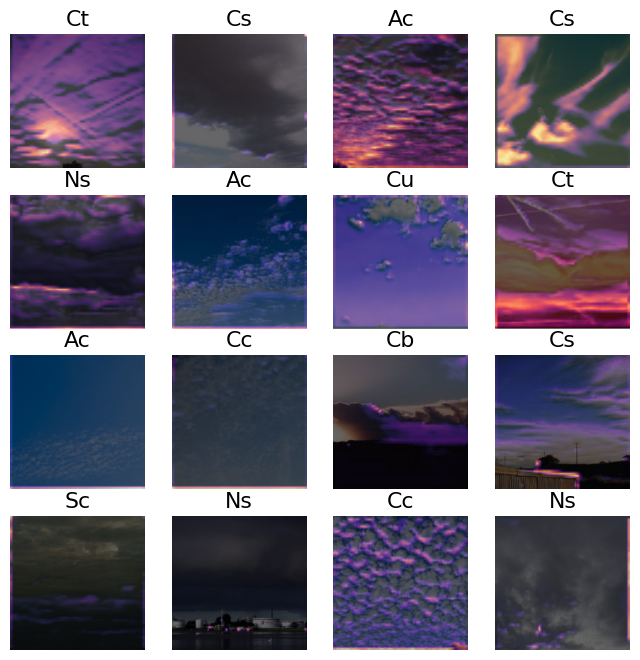

In [31]:
x_ori, y_ori = test_loader_ori.one_batch()
xy_list_decode_ori = test_loader_ori.decode_batch((x_ori, y_ori), max_n=num_heatmap)

cam_map = [get_gradcam(x_ori[i], y_ori[i], target_layer, learner.model) for i in range(num_heatmap)]
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
for i, ax in enumerate(axs.flat):
    plot_gradcam(*xy_list_decode_ori[i], cam_map[i], ax=ax)

# ResNet18
## Define Learner

In [32]:
model = models.resnet18(num_classes=11, pretrained=False)
learner = Learner(train_loader, model, path='..')
learner.load('ResNet18')

## Use all images in the test data set to evaluate the model

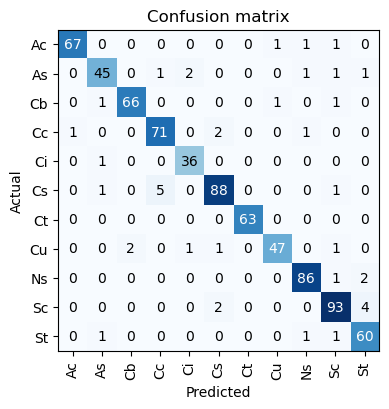

In [33]:
interp = ClassificationInterpretation.from_learner(learner, dl=test_loader)
interp.plot_confusion_matrix(figsize=(4, 4))

In [34]:
interp.print_classification_report()

              precision    recall  f1-score   support

          Ac       0.99      0.96      0.97        70
          As       0.92      0.88      0.90        51
          Cb       0.97      0.96      0.96        69
          Cc       0.92      0.95      0.93        75
          Ci       0.92      0.97      0.95        37
          Cs       0.95      0.93      0.94        95
          Ct       1.00      1.00      1.00        63
          Cu       0.96      0.90      0.93        52
          Ns       0.96      0.97      0.96        89
          Sc       0.93      0.94      0.93        99
          St       0.90      0.95      0.92        63

    accuracy                           0.95       763
   macro avg       0.95      0.95      0.95       763
weighted avg       0.95      0.95      0.95       763



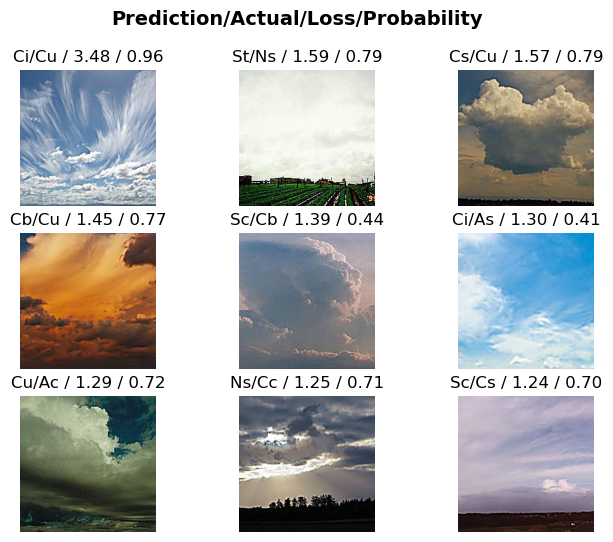

In [35]:
interp.plot_top_losses(9, figsize=(8, 6))

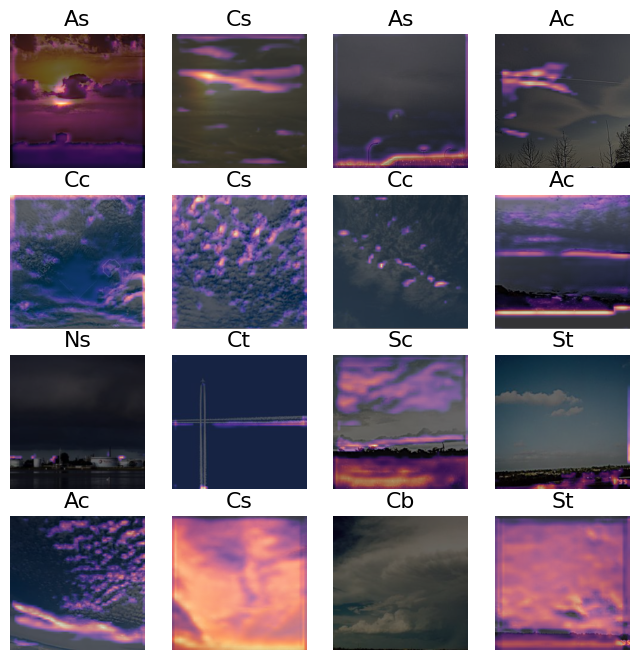

In [36]:
target_layer = learner.model.layer1
learner.model.to('cuda')

cam_map = [get_gradcam(x[i], y[i], target_layer, learner.model) for i in range(num_heatmap)]
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
for i, ax in enumerate(axs.flat):
    plot_gradcam(*xy_list_decode[i], cam_map[i], ax=ax)

## Use the resized images in the test data set to evaluate the model

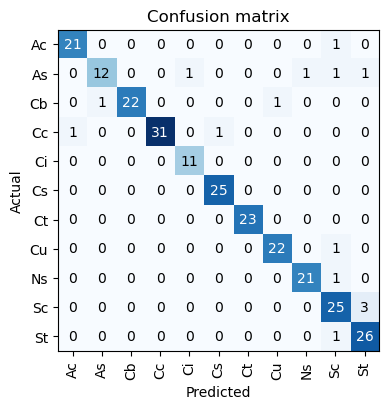

In [37]:
interp = ClassificationInterpretation.from_learner(learner, dl=test_loader_ori)
interp.plot_confusion_matrix(figsize=(4, 4))

In [38]:
interp.print_classification_report()

              precision    recall  f1-score   support

          Ac       0.95      0.95      0.95        22
          As       0.92      0.75      0.83        16
          Cb       1.00      0.92      0.96        24
          Cc       1.00      0.94      0.97        33
          Ci       0.92      1.00      0.96        11
          Cs       0.96      1.00      0.98        25
          Ct       1.00      1.00      1.00        23
          Cu       0.96      0.96      0.96        23
          Ns       0.95      0.95      0.95        22
          Sc       0.83      0.89      0.86        28
          St       0.87      0.96      0.91        27

    accuracy                           0.94       254
   macro avg       0.94      0.94      0.94       254
weighted avg       0.94      0.94      0.94       254



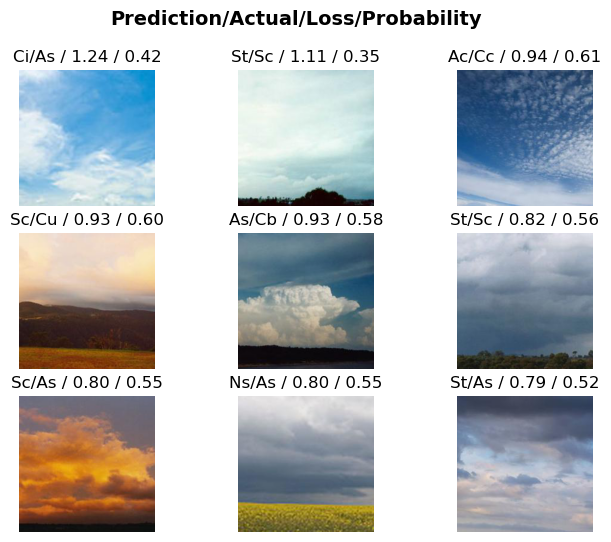

In [39]:
interp.plot_top_losses(9, figsize=(8, 6))

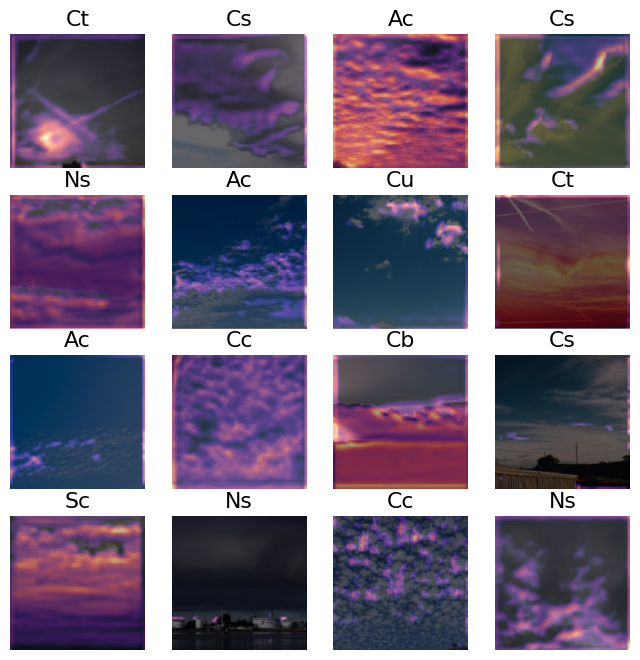

In [40]:
cam_map = [get_gradcam(x_ori[i], y_ori[i], target_layer, learner.model) for i in range(num_heatmap)]
fig, axs = plt.subplots(4, 4, figsize=(8, 8))
for i, ax in enumerate(axs.flat):
    plot_gradcam(*xy_list_decode_ori[i], cam_map[i], ax=ax)

# Summary
- CloudNet and ResNet18 achieve similar performance, and these two models capture different features of the cloud.
- Both models are affected by other objects